<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/waveletExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pywt

In [2]:
x = [3, 7, 1, 1, -2, 5 ,4 , 6]
db1 = pywt.Wavelet('db1')
a3, d3, d2, d1 = pywt.wavedec(x, db1)


In [3]:
print(a3)

[8.83883476]


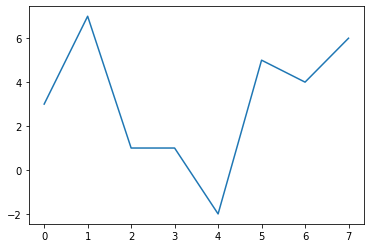

In [4]:
import matplotlib.pyplot as plt
plt.plot(x)

In [5]:
print(pywt.waverec([a3, d3, d2, d1], db1))

[ 3.  7.  1.  1. -2.  5.  4.  6.]


In [9]:
coeffs = pywt.swt(x, db1,level=3)
coeffs

[(array([8.83883476, 8.83883476, 8.83883476, 8.83883476, 8.83883476,
         8.83883476, 8.83883476, 8.83883476]),
  array([-0.35355339, -3.8890873 , -5.30330086, -3.18198052,  0.35355339,
          3.8890873 ,  5.30330086,  3.18198052])),
 (array([ 6. ,  3.5,  2.5,  4. ,  6.5,  9. , 10. ,  8.5]),
  array([ 4.0000000e+00,  4.5000000e+00, -5.0000000e-01, -5.0000000e+00,
         -3.5000000e+00, -8.8817842e-16,  0.0000000e+00,  5.0000000e-01])),
 (array([ 7.07106781,  5.65685425,  1.41421356, -0.70710678,  2.12132034,
          6.36396103,  7.07106781,  6.36396103]),
  array([-2.82842712,  4.24264069,  0.        ,  2.12132034, -4.94974747,
          0.70710678, -1.41421356,  2.12132034]))]

In [11]:
print(pywt.iswt(coeffs, db1))

[ 3.  7.  1.  1. -2.  5.  4.  6.]


In [12]:
(A3, D3), (A2, D2), (A1, D1) = pywt.swt(x, db1, level=3)

In [13]:
a3

array([8.83883476])

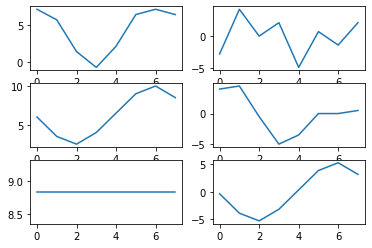

In [14]:
plt.subplot(321)
plt.plot(A1)
plt.subplot(322)
plt.plot(D1)
plt.subplot(323)
plt.plot(A2)
plt.subplot(324)
plt.plot(D2)

plt.subplot(325)
plt.plot(A3)
plt.subplot(326)
plt.plot(D3)


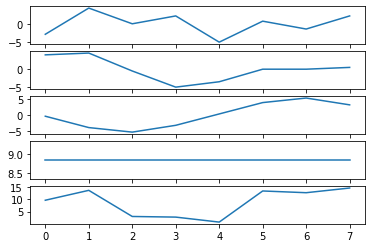

In [15]:
plt.subplot(511)
plt.plot(D1)
plt.subplot(512)
plt.plot(D2)
plt.subplot(513)
plt.plot(D3)
plt.subplot(514)
plt.plot(A3)
plt.subplot(515)
plt.plot(A3 + D3 + D2 + D1 )



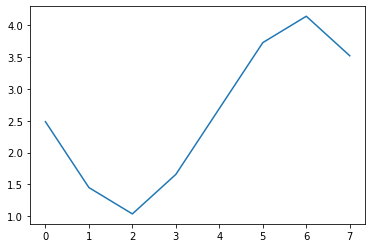

In [16]:
plt.plot(A3 + D3 - A2)

### Read data

In [19]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt


ppg = pd.read_csv('drive/MyDrive/Dataset/Packs/longcun02.csv', header=0)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


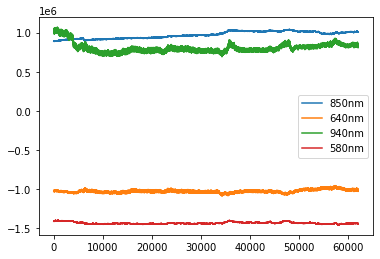

In [ ]:
ppg.plot()

In [26]:
from sklearn.preprocessing import minmax_scale
#Wavelet Decompsition
# take the number data in even length
#data  = minmax_scale(ppg['940nm'][0:np.size(ppg['940nm'])//2*2])
# function calculate length of data in power of 2 and larger > 1023 point
#name = '580nm'
def read_data(dataframe,name='940nm'):
  #name = '940nm'
  M = np.size(dataframe[name])
  n = np.floor(np.log2(M))
  N = int(2**n)
  res = M - N
  while res > 1023:
    n = np.floor(np.log2(res))
    N = N + int(2**n)
    res = M - N
  
  #data  = ppg[name][0:N] - np.mean(ppg[name][0:N])

  return minmax_scale(ppg[name][0:N])
  
data = read_data(ppg, name='940nm')
#data  = ppg['940nm'][0:N]
WDS = pywt.swt(data, 'db10', level=7)

In [ ]:
np.size(ppg['940nm'])

62111

In [ ]:
np.log2(np.size(ppg['940nm']))- np.floor(np.log2(np.size(ppg['940nm'])))

0.922561175210852

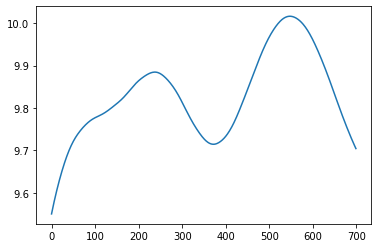

In [27]:
plt.plot(WDS[0][0][1000:1700])

In [ ]:
WDS = pywt.swt(bwrPPG, 'db10', level=7)

##Plot with single command

[]

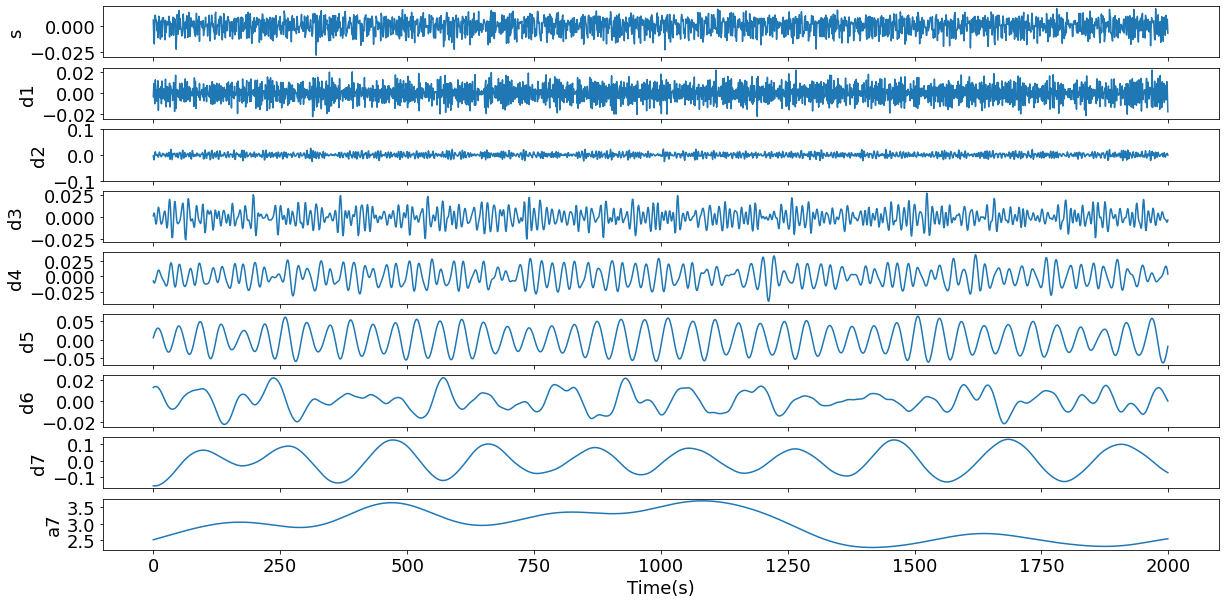

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})
# length of window observation
L1, L2 = 20000, 22000
plt.subplot(9, 1, 9)
plt.plot(WDS[0][0][L1:L2])
plt.xlabel('Time(s)')
plt.ylabel('a7')
#frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 8)
plt.plot(WDS[0][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d7')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 7)
plt.plot(WDS[1][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d6')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 6)
plt.plot(WDS[2][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d5')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 5)
plt.plot(WDS[3][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d4')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 4)
plt.plot(WDS[4][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d3')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 3)
plt.plot(WDS[5][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d2')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.ylim([-0.1,0.1])

plt.subplot(9, 1, 2)
plt.plot(WDS[6][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d1')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 1)
plt.plot(bwrPPG[L1:L2])
#plt.plot(data[L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('s')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

### Plot with for command

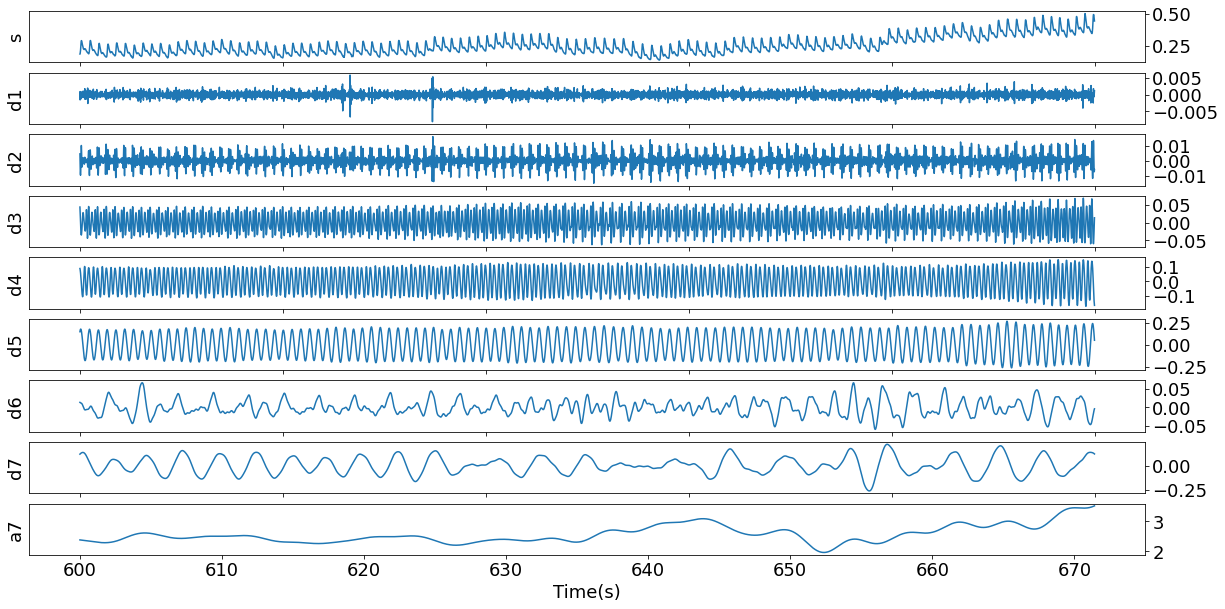

In [ ]:
fig,axs = plt.subplots(9,1,figsize=(20,10))
#fig.subplots_adjust(hspace=0.2, wspace=0.0)
#plt.rcParams['axes.titlepad'] = 20 
L1, L2 = 42000, 47000
# range of x after convert to sampling rate at 70
x = [i/70 for i in range(L1,L2)]


n = [i for i in range(0,9)]
labels = ['s','d1','d2','d3','d4','d5','d6','d7', 'a7']
for ax,i in zip(axs,n):
  

  if i==8:
     ax.plot(x, WDS[0][0][L1:L2])
     ax.set_xlabel('Time(s)') 
     #ax.xaxis.set_ticklabels(xlabel)
  elif i==0:
    ax.plot(data[L1:L2])
    #ax.xaxis.set_ticklabels([])
  else:
    ax.plot(WDS[7-i][1][L1:L2])
    #ax.xaxis.set_ticklabels([]) # hidden xtick
    #ax.set_ylim([-0.1,0.1])
  ax.set_ylabel(labels[i])
  ax.yaxis.tick_right()
  ax.yaxis.Exponent = 5
  #ax.yaxis.set_label_position("right")
  ax.label_outer() # hidden xtick
  
  #ax.title.set_position([5.5, 1.05])  

#fig.subplots_adjust(left=0.20)

### Combine wave band

In [ ]:
s=[]
s.append(data)
s.append(WDS[6][1]+ WDS[5][1]) ## s0 = d1 + d2
s.append(WDS[4][1]+ WDS[3][1]) ## s1 = d3 + d4
s.append(WDS[2][1]+ WDS[1][1] + WDS[0][1]) ## s2 = d5 + d6 + d7
#s.append(WDS[2][1]+ WDS[1][1] ) ## s2 = d5 + d6 + d7
s.append(WDS[0][0]) # a7

In [ ]:
s=[]
s.append(data)
s.append(WDS[6][1]) ## s0 = d1
s.append(WDS[5][1]+ WDS[4][1]) ## s1 = d2 + d3
#s.append(WDS[3][1]+ WDS[2][1] + WDS[1][1] ) ## s2 = d4 + d5 
s.append(WDS[3][1]+ WDS[2][1] ) ## s2 = d5 + d6 + d7
s.append(WDS[0][0] + WDS[1][1] + WDS[0][1] ) # a7

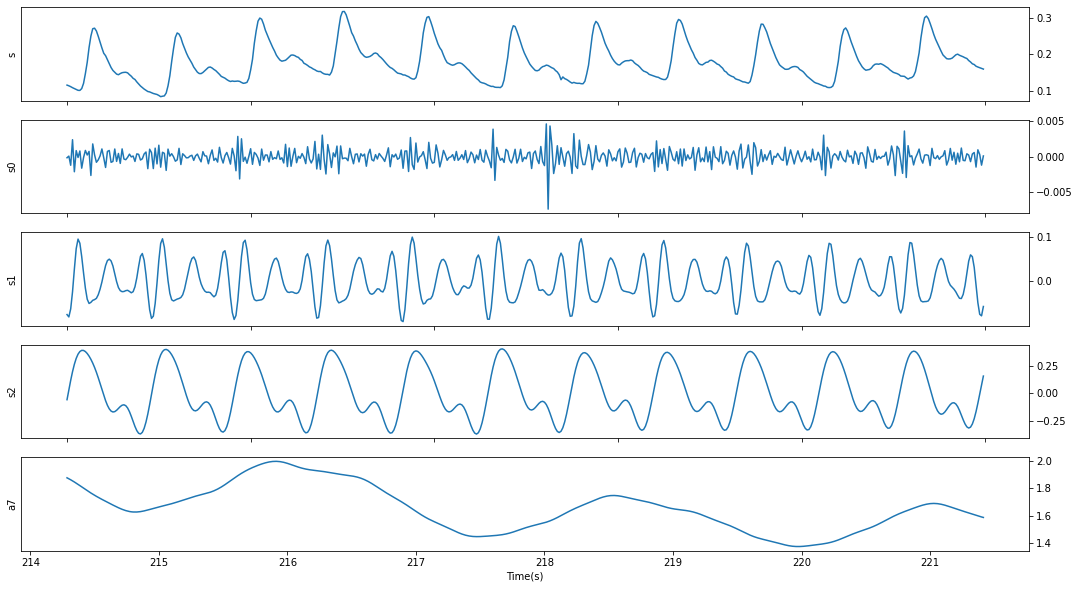

In [ ]:
fig,axs = plt.subplots(5,1,figsize=(20,10))
L1 , L2 = 15000, 15500
# range of x after convert to sampling rate at 70
x = [i/70 for i in range(L1,L2)]


n = [i for i in range(0,5)]
labels = ['s','s0','s1','s2','a7']
for ax,i in zip(axs,n):
  

  if i==4:
     ax.plot(x, s[i][L1:L2])
     ax.set_xlabel('Time(s)') 
     #ax.xaxis.set_ticklabels(xlabel)
  else:
    ax.plot(s[i][L1:L2])
    #ax.xaxis.set_ticklabels([]) # hidden xtick
    #ax.set_ylim([-0.1,0.1])
  ax.set_ylabel(labels[i])
  ax.yaxis.tick_right()
  ax.yaxis.Exponent = 5
  #ax.yaxis.set_label_position("right")
  ax.label_outer() # hidden xtick
  
  #ax.title.set_position([5.5, 1.05])  

fig.subplots_adjust(left=0.20)

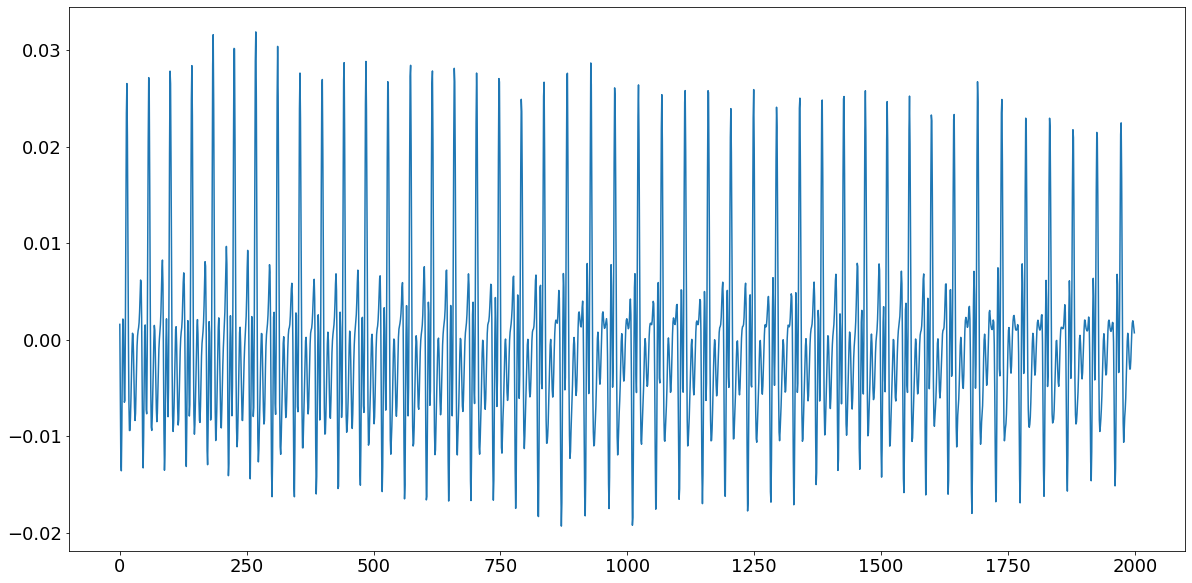

In [ ]:
p = [s1*s2 for s1, s2 in zip(s[2],s[3])]
np.size(p)
plt.subplots(figsize=(20,10))
plt.plot(p[L1:L2])

### Recontruction of Data

In [ ]:
#db10 = pywt.Wavelet('db10')
coeffs = pywt.swt(data, 'db10',level=1)
ppgRec = pywt.waverec(coeffs, 'db4')

In [ ]:
len(coeffs[0][1])
#np.shape(coeffs[0])

61440

In [ ]:
np.sum(coeffs[0])

24417.624286913302

In [ ]:
len(ppgRec)

61440

In [ ]:
np.shape(ppgRec)

(15374,)

### Remove baseline

This programe from the paper source code:
 https://mitbal.wordpress.com/2014/07/08/baseline-wander-removal-dengan-wavelet/

In [ ]:
def calc_baseline(signal):
    """
    Calculate the baseline of signal.
    Args:
        signal (numpy 1d array): signal whose baseline should be calculated
    Returns:
        baseline (numpy 1d array with same size as signal): baseline of the signal
    """
    ssds = np.zeros((3))

    cur_lp = np.copy(signal)
    iterations = 0
    while True:
        # Decompose 1 level
        lp, hp = pywt.dwt(cur_lp, "db4")
        #coeffs = pywt.swt(cur_lp, 'db10', level=1)

        # Shift and calculate the energy of detail/high pass coefficient
        #ssds = np.concatenate(([np.sum(hp ** 2)], ssds[:-1]))
        ssds = np.concatenate(([np.sum(np.abs(hp)** 2)], ssds[:-1]))
        
        #ssds = np.concatenate(([np.sum(coeffs[0][1] ** 2)], ssds[:-1]))

        # Check if we are in the local minimum of energy function of high-pass signal
        if ssds[2] > ssds[1] and ssds[1] < ssds[0]:
            break

        cur_lp = lp[:]
        #cur_lp = coeffs[0][0]
        iterations += 1

    # Reconstruct the baseline from this level low pass signal up to the original length
    baseline = cur_lp[:]
    print(iterations)
    for _ in range(iterations):
        baseline = pywt.idwt(baseline, np.zeros((len(baseline))), "db4")

    return baseline[: len(signal)]

#### Simpler code for meadian filter

In [ ]:
k = 5
k2 = (k-1)//2
y = np.zeros(len(x))
for i in range(len(x)):
  z = np.zeros(k) ### length k elements
  if i - k2 <0:
    z[k2-i:]= x[0:k-k2+i]
    z[0:k2-i]=x[0]
    #print(z)
  elif i + k2 > len(x)-1:
    z[:k-k2 - i +len(x)-1]=x[-k + k2 +i-len(x)+1:]
    z[k-k2 -i+len(x)-1:] = x[-1]
  else:
    z = x[i-k2:i+k2+1]
  print(z)
  y[i] = np.median(z)



[1, 2, 3]

In [ ]:
lp, hp = pywt.dwt(data, "db4")

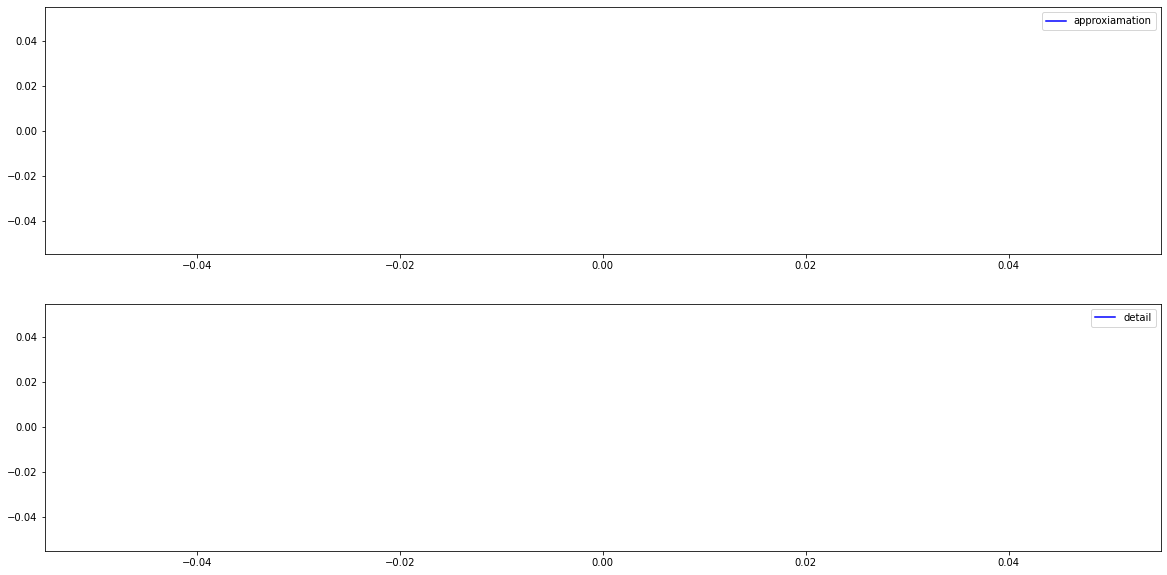

In [ ]:
plt.subplots(2,1,figsize=(20,10))

plt.subplot(2, 1, 1)
plt.plot(lp[L1:L2], "b-", label="approxiamation")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(hp[L1:L2], "b-", label="detail")
plt.legend()
plt.show()

In [ ]:
np.sum(np.abs(hp)** 1.5)

1.0083303908816355

In [ ]:
np.abs(hp)

array([0.00026764, 0.00151084, 0.00107034, ..., 0.00043982, 0.0015148 ,
       0.00039355])

In [ ]:
np.power([2, 3],1.5)

array([2.82842712, 5.19615242])

### Calculating baseline

In [ ]:
baseline = calc_baseline(data)

bwrPPG = data - baseline

baseline1 = calc_baseline(bwrPPG)

bwrPPG1 = bwrPPG - baseline1

3
6


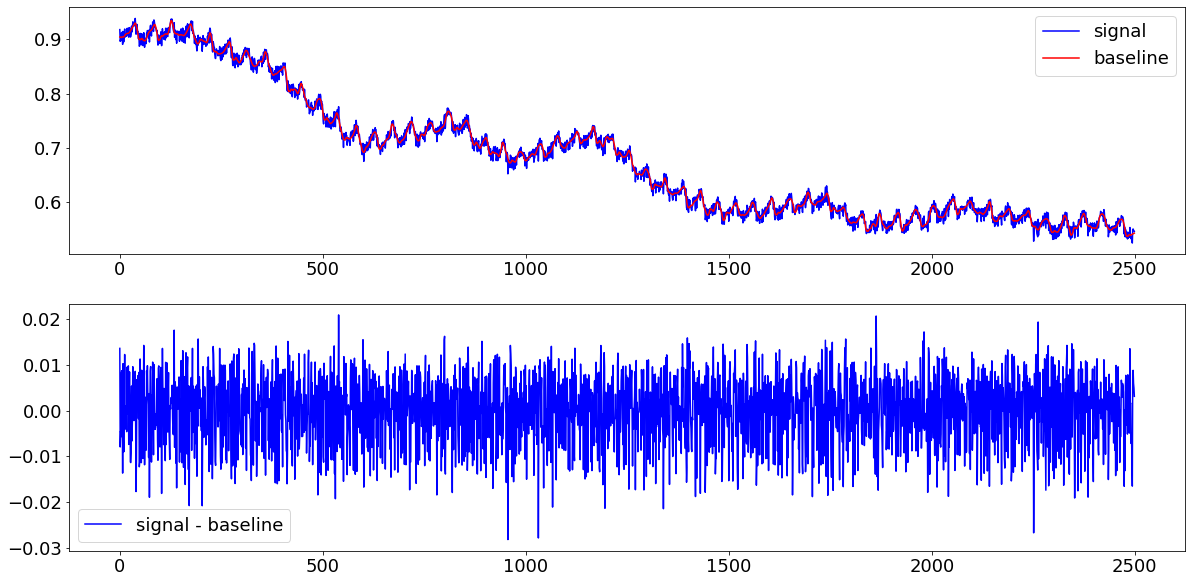

In [ ]:
L1, L2 = 36000, 38500
plt.subplots(2,1,figsize=(20,10))

plt.subplot(2, 1, 1)
plt.plot(data[L1:L2], "b-", label="signal")
plt.plot(baseline[L1:L2], "r-", label="baseline")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bwrPPG[L1:L2], "b-", label="signal - baseline")
plt.legend()
plt.show()

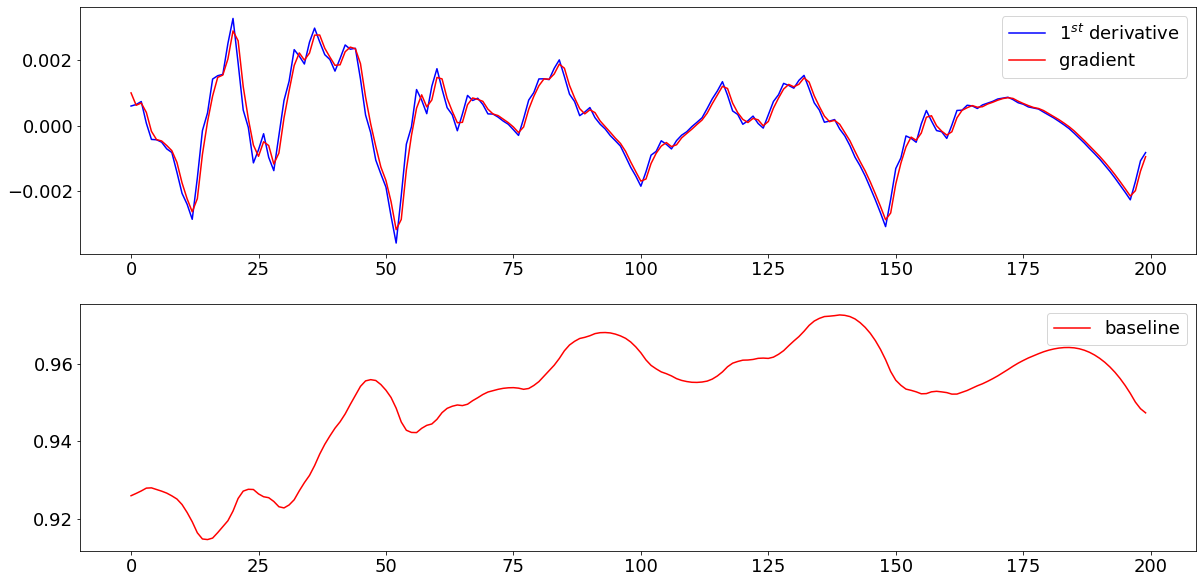

In [ ]:
d1Baseline = np.diff(baseline, append=0)
d2Baseline = np.gradient(baseline)
L1, L2 = 200, 400
plt.subplots(2,1,figsize=(20,10))
plt.subplot(2, 1, 1)
plt.plot(d1Baseline[L1:L2], "b-", label="$1^{st}$ derivative")
plt.plot(d2Baseline[L1:L2], "r-", label="gradient")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(baseline[L1:L2], "r-", label="baseline")
plt.legend()

In [ ]:
len(d1Baseline), len(baseline), len(d2Baseline)

(61440, 61440, 61440)

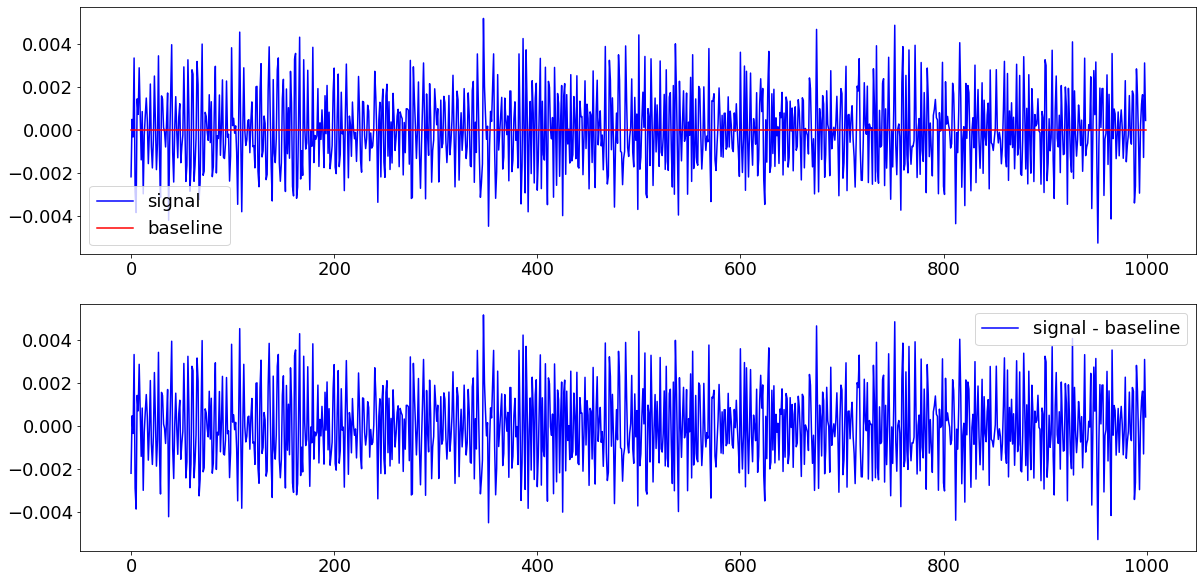

In [ ]:
plt.subplots(2,1,figsize=(20,10))
L1, L2=54000, 55000
plt.subplot(2, 1, 1)
plt.plot(bwrPPG[L1:L2], "b-", label="signal")
plt.plot(baseline1[L1:L2], "r-", label="baseline")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bwrPPG1[L1:L2], "b-", label="signal - baseline")
plt.legend()
plt.show()

### Median filter
based on source https://gist.github.com/bhawkins/3535131

In [ ]:
def medfilt (x, k):
    """Apply a length-k median filter to a 1D array x.
    Boundaries are extended by repeating endpoints.
    """
    assert k % 2 == 1, "Median filter length must be odd."
    assert x.ndim == 1, "Input must be one-dimensional."
    k2 = (k - 1) // 2
    y = np.zeros ((len (x), k), dtype=x.dtype)
    y[:,k2] = x
    for i in range (k2):
        j = k2 - i
        y[j:,i] = x[:-j]
        y[:j,i] = x[0]
        y[:-j,-(i+1)] = x[j:]
        y[-j:,-(i+1)] = x[-1]
    return np.median (y, axis=1)


def test ():
    import pylab as p
    x = np.linspace (0, 1, 101)
    x[3::10] = 1.5
    p.plot (x)
    p.plot (medfilt (x,3))
    p.plot (medfilt (x,25))
    p.show ()


In [ ]:
x = [1,10,20,30,50,1,1,10,20,30,50,2]
x = np.array(x)
y = np.zeros ((len (x), 5), dtype=x.dtype)
y[:,2] = x
y
k2 =2
for i in range (k2):
        j = k2 - i
        y[j:,i] = x[:-j]
        y[:j,i] = x[0]
        y[:-j,-(i+1)] = x[j:]
        y[-j:,-(i+1)] = x[-1]
y


array([[ 1,  1,  1, 10, 20],
       [ 1,  1, 10, 20, 30],
       [ 1, 10, 20, 30, 50],
       [10, 20, 30, 50,  1],
       [20, 30, 50,  1,  1],
       [30, 50,  1,  1, 10],
       [50,  1,  1, 10, 20],
       [ 1,  1, 10, 20, 30],
       [ 1, 10, 20, 30, 50],
       [10, 20, 30, 50,  2],
       [20, 30, 50,  2,  2],
       [30, 50,  2,  2,  2]])

In [ ]:
np.median (y, axis=1)

array([ 1., 10., 20., 20., 20., 10., 10., 10., 20., 20., 20.,  2.])

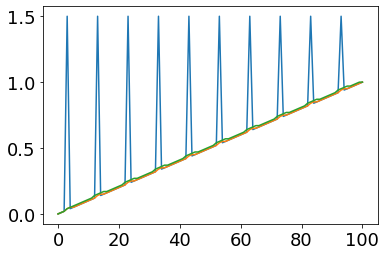

In [ ]:
test()

In [ ]:
baseline2 = medfilt(data,101)
bwrPPG2 = data - baseline2

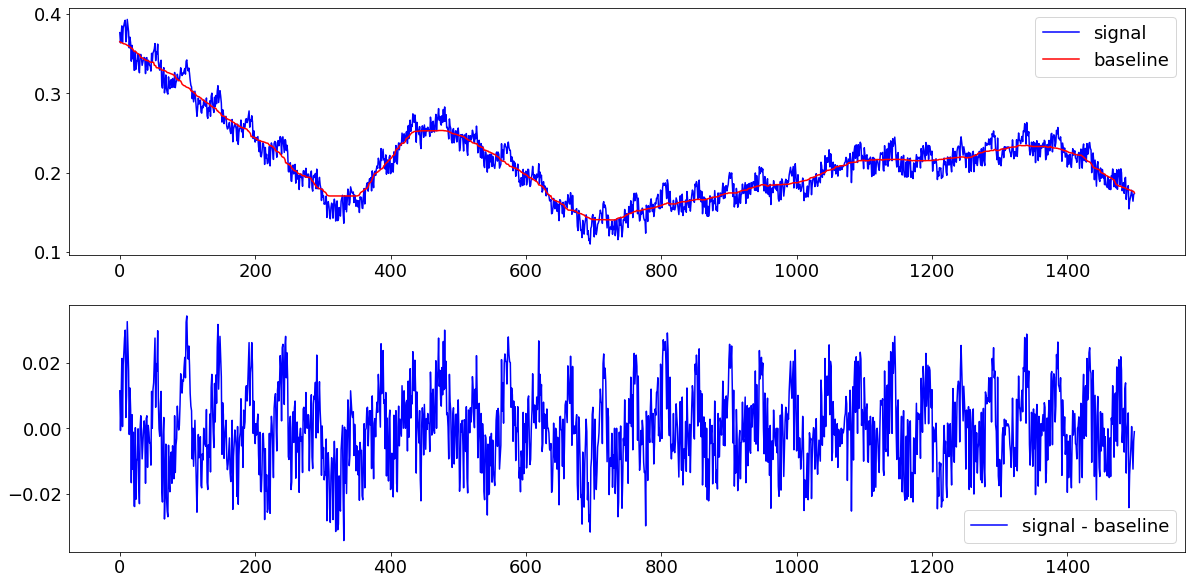

In [ ]:
plt.subplots(2,1,figsize=(20,10))
L1, L2 = 54000, 55500
plt.subplot(2, 1, 1)
plt.plot(data[L1:L2], "b-", label="signal")
plt.plot(baseline2[L1:L2], "r-", label="baseline")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bwrPPG2[L1:L2], "b-", label="signal - baseline")
plt.legend()
plt.show()

In [ ]:
baseline3 = medfilt(data,97)
bwrPPG3 = data - baseline3

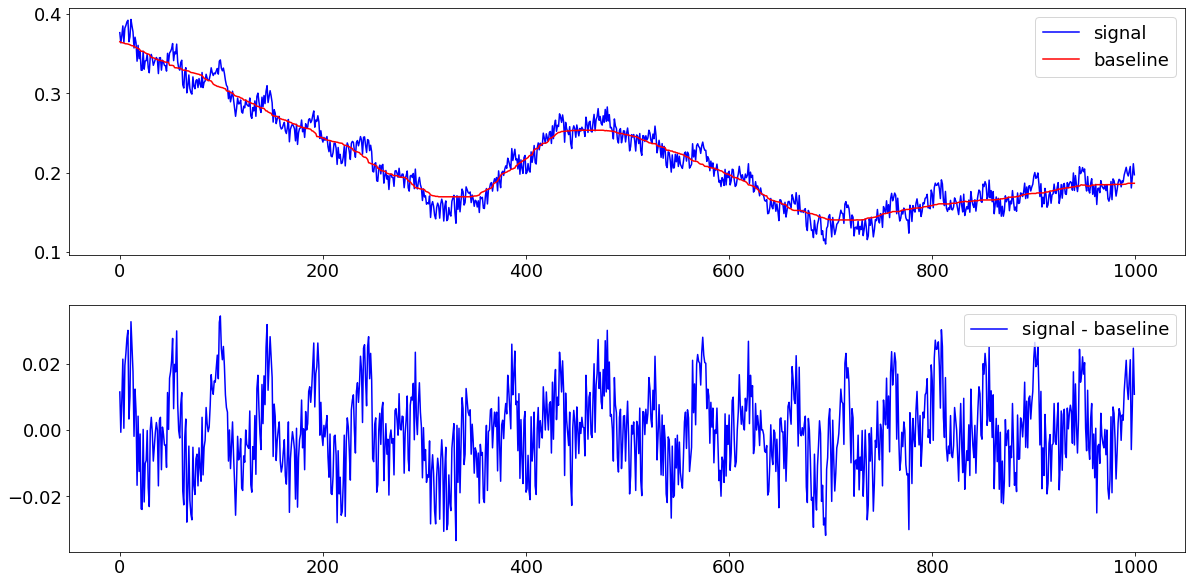

In [ ]:
plt.subplots(2,1,figsize=(20,10))
L1, L2 = 54000, 55000
plt.subplot(2, 1, 1)
plt.plot(data[L1:L2], "b-", label="signal")
plt.plot(baseline3[L1:L2], "r-", label="baseline")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bwrPPG3[L1:L2], "b-", label="signal - baseline")
plt.legend()
plt.show()

### Adaptive median filter

In [ ]:
import math
def medfilt2 (x, kmin, kmax):
    """Apply a length-k median filter to a 1D array x.
    Boundaries are extended by repeating endpoints.
    """
    assert kmin % 2 == 1 and kmax%2==1, "Median filter length must be odd."
    assert kmin <= kmax, "k1 must be smaller than k2"
    assert x.ndim == 1, "Input must be one-dimensional."
    #k2 = (kmin - 1) // 2
    """
    y = np.zeros ((len (x), kmin), dtype=x.dtype)
    y[:,k2] = x
    for i in range (k2):
        j = k2 - i
        y[j:,i] = x[:-j]
        y[:j,i] = x[0]
        y[:-j,-(i+1)] = x[j:]
        y[-j:,-(i+1)] = x[-1]
    """
    y = np.zeros(len(x))
    
    for i in range(len(x)):
      k = kmin
      while (k <= kmax):
        #k2 = (k - 1) // 2
        z = subCopy(x,k,i) ## make a window of data
        S1 = np.min(z) 
        S3 = np.max(z)
        S2 = np.median(z)
        if S1 < S2 and S2 < S3:
          if x[i] < S3 and x[i] > S1:
            y[i] = x[i]
          else:
            y[i] = S2
          break # exit while
        else:
          k = k + 2
          if k > kmax:
            y[i] = S2
      #print(i, k)  
    return y 



    #return np.median (y, axis=1)

def subCopy(x,k,i):
  #k is windows length, i is position in x and in range(0, len(x))
  k2 = (k-1)//2
  z = np.zeros(k) ### length k elements
  if i - k2 <0:
     z[k2-i:]= x[0:k-k2+i]
     z[0:k2-i]=x[0]
    #print(z)
  elif i + k2 > len(x)-1:
     z[:k-k2 - i +len(x)-1]=x[-k + k2 +i-len(x)+1:]
     z[k-k2 -i+len(x)-1:] = x[-1]
  else:
     z = x[i-k2:i+k2+1]
  return z
def test ():
    import pylab as p
    x = np.linspace (0, 1, 101)
    x = np.arange(0,4*np.pi,0.1)
    x1 = np.sin(x)
    #x1[3::10] = 1.5
    p.plot (x1)
    p.plot (medfilt2(x1,13,15))
    p.plot (medfilt (x1,5))
    p.show ()

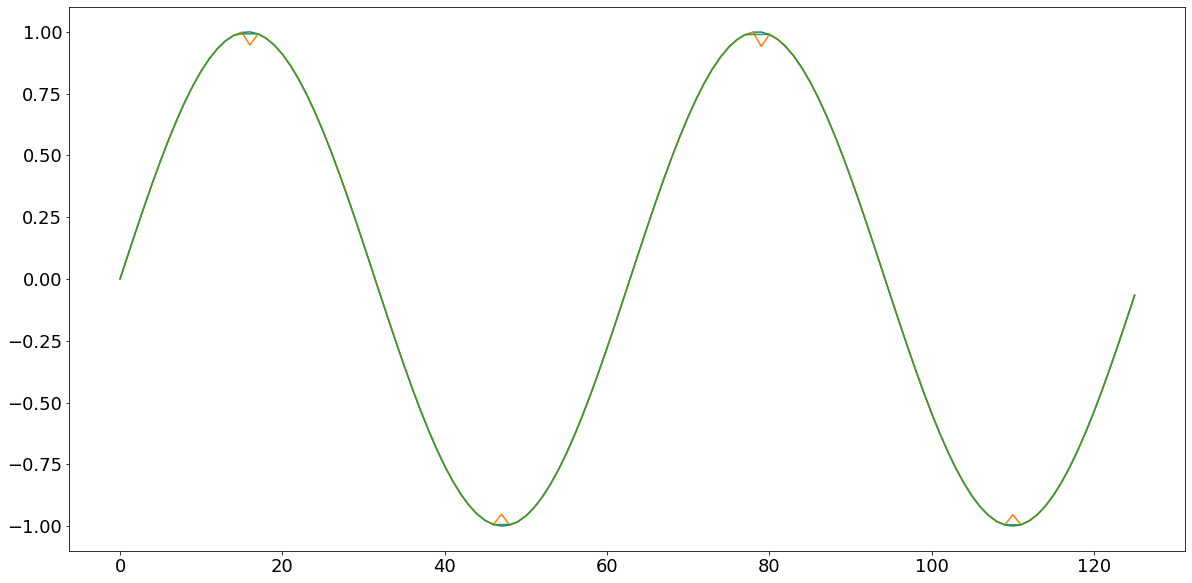

In [ ]:
plt.subplots(figsize=(20,10))
test()

In [ ]:
baseline3 = medfilt2(data,33, 73)
#baseline3 = medfilt(data,31)
bwrPPG3 = data - baseline3
#bwrPPG3 = bwrPPG - baseline3

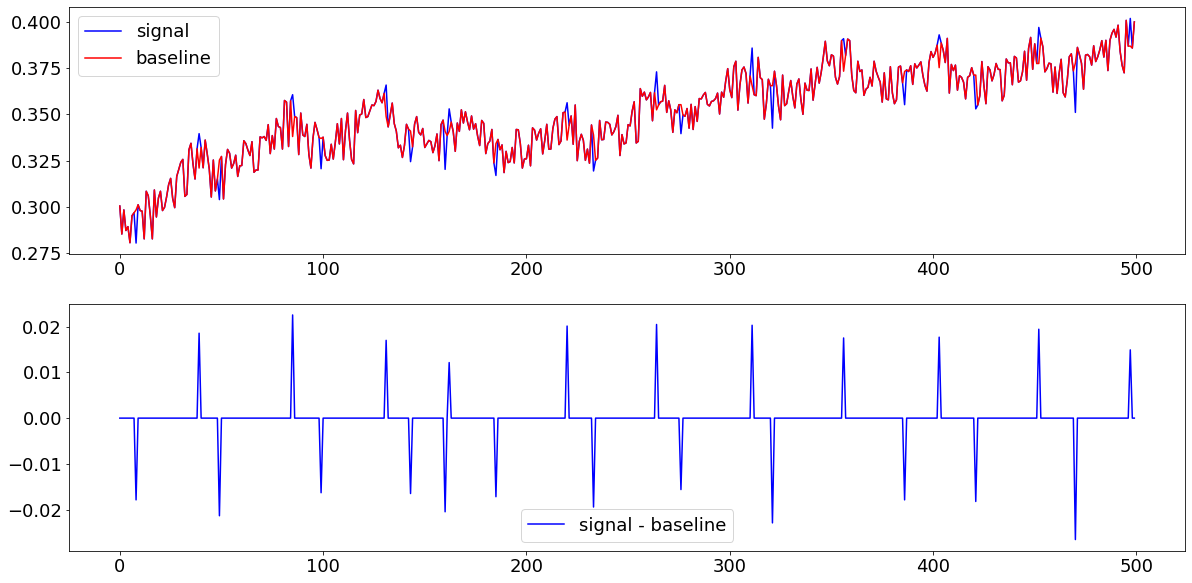

In [ ]:
plt.subplots(2,1,figsize=(20,10))
L1, L2 = 25000, 25500
plt.subplot(2, 1, 1)
plt.plot(data[L1:L2], "b-", label="signal")
#plt.plot(bwrPPG[L1:L2], "b-", label="signal")
plt.plot(baseline3[L1:L2], "r-", label="baseline")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bwrPPG3[L1:L2], "b-", label="signal - baseline")
plt.legend()
plt.show()

In [ ]:
x = np.arange(0,np.pi,0.1)
x1 = 4*np.sin(x)
y = medfilt2(x1, 13,13)

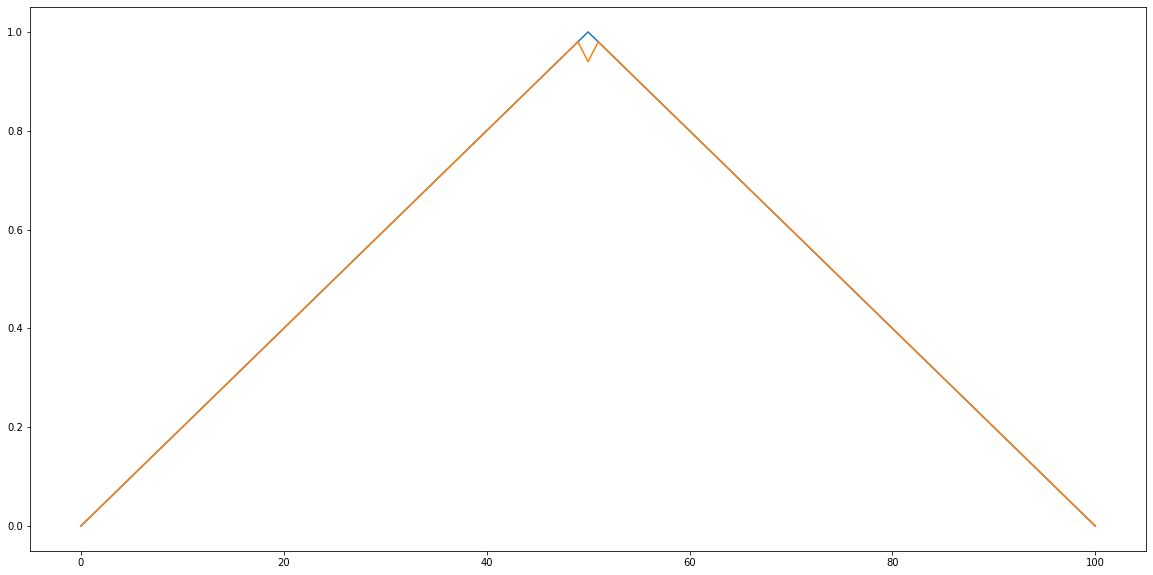

In [ ]:
y = medfilt2(x, 13,13)
plt.subplots(figsize=(20,10))
plt.plot(x)
plt.plot(y)

In [ ]:
x = np.zeros(101)
x1 = np.linspace (0, 1, 51)
x2 = np.linspace (1-0.02, 0, 50)
x[0:51] = x1
x[51:] = x2

In [ ]:
data= ppg['640nm']

### Two stage Median Filter for Baseline wander removing

In [ ]:
import math
def medfilt3 (x, kmin, kmax, method='mean'):
    """Apply a length-k median filter to a 1D array x.
    Boundaries are extended by repeating endpoints.
    """
    assert kmin % 2 == 1 and kmax%2==1, "Median filter length must be odd."
    assert kmin <= kmax, "k1 must be smaller than k2"
    assert x.ndim == 1, "Input must be one-dimensional."
    ### Giai thuat co hai lua chon, dung Mean 2 tang/ Median 2 Tang
    K1 = np.mean(x)
    #Xn = x - K1
    
    Xn = x
    y = np.zeros(len(x))
    if (method is'mean'):
      y1 = np.zeros(len(x))
      for i in range(len(Xn)):
        z = subCopy(Xn,kmin,i) # window 1
        y1[i] = np.mean(z) #mean X1(:,j)
      for i in range(len(y1)):
        z = subCopy(y1,kmax,i) # window 2
        y[i] = np.mean(z) #mean X2(:,j)
    else: # method ='median'
      y1 = np.zeros(len(x))
      for i in range(len(Xn)):
        z = subCopy(Xn,kmin,i) # window 1
        y1[i] = np.median(z) #mean X1(:,j)
      for i in range(len(y1)):
        z = subCopy(y1,kmax,i) # window 2
        y[i] = np.median(z) #mean X2(:,j)
    
    K2 = np.mean(y)
    
    return y



    #return np.median (y, axis=1)

def subCopy(x,k,i):
  #k is windows length, i is position in x and in range(0, len(x))
  k2 = (k-1)//2
  z = np.zeros(k) ### length k elements
  if i - k2 <0:
     z[k2-i:]= x[0:k-k2+i]
     z[0:k2-i]=x[0]
    #print(z)
  elif i + k2 > len(x)-1:
     z[:k-k2 - i +len(x)-1]=x[-k + k2 +i-len(x)+1:]
     z[k-k2 -i+len(x)-1:] = x[-1]
  else:
     z = x[i-k2:i+k2+1]
  return z
def test ():
    import pylab as p
    x = np.linspace (0, 1, 101)
    x = np.arange(0,4*np.pi,0.1)
    x1 = np.sin(x)
    x1[3::10] = 1.5
    p.plot (x1)
    p.plot (medfilt3(x1,3,7,method='median'))
    p.plot (medfilt (x1,3))
    p.show ()

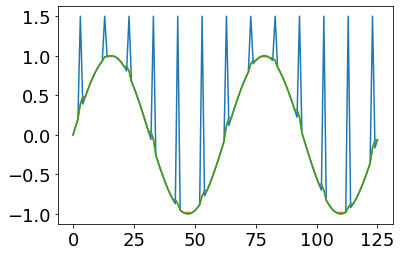

In [ ]:
test()

In [ ]:
baseline3 = medfilt3(data,21, 43,method='median')
baseline4 = medfilt3(data,21, 43,method='mean')

bwrPPG3 = data - baseline3
bwrPPG4 = data - baseline4

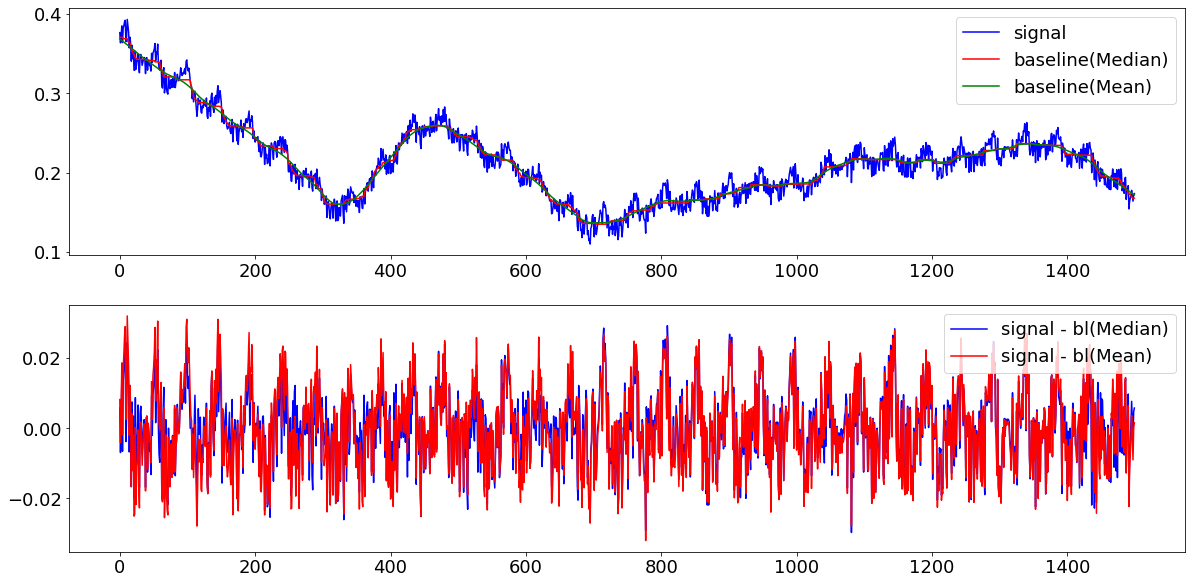

In [ ]:
plt.subplots(2,1,figsize=(20,10))
L1, L2 = 54000, 55500
plt.subplot(2, 1, 1)
plt.plot(data[L1:L2], "b-", label="signal")
plt.plot(baseline3[L1:L2], "r-", label="baseline(Median)")
plt.plot(baseline4[L1:L2], "g-", label="baseline(Mean)")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bwrPPG3[L1:L2], "b-", label="signal - bl(Median)")
plt.plot(bwrPPG4[L1:L2], "r-", label="signal - bl(Mean)")
plt.legend()
plt.show()




In [ ]:
print(np.corrcoef(bwrPPG3,bwrPPG4))
print(np.corrcoef(bwrPPG2,bwrPPG3) )
print(np.corrcoef(bwrPPG,bwrPPG3) )

[[1.         0.99293854]
 [0.99293854 1.        ]]
[[1.         0.98776458]
 [0.98776458 1.        ]]
[[1.         0.98862674]
 [0.98862674 1.        ]]


##Peak detection

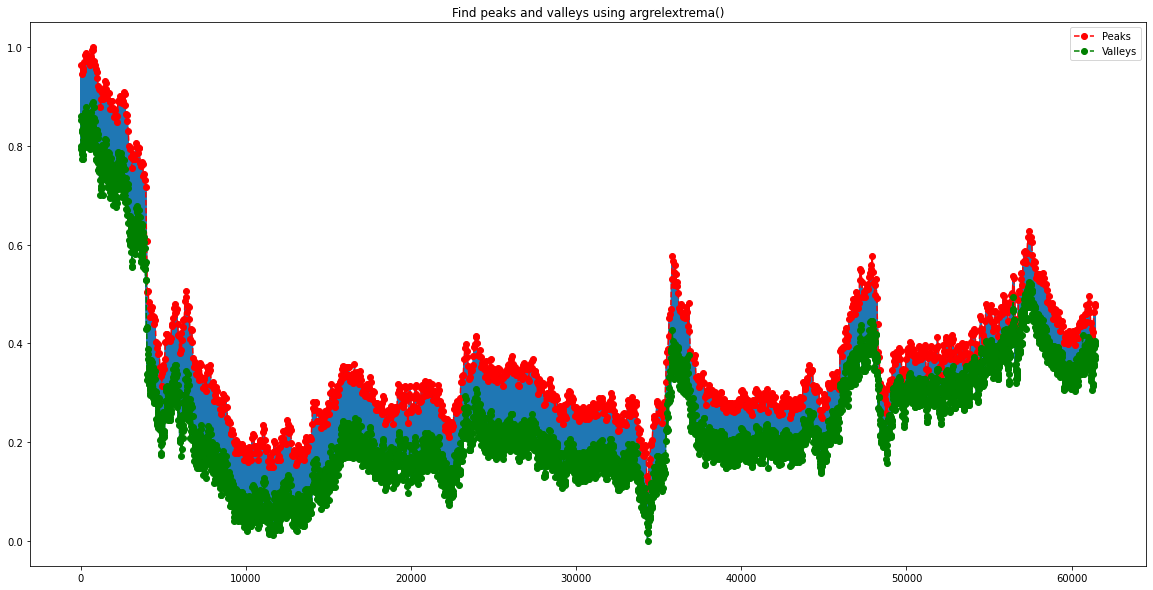

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

L1, L2 = 0, len(data)
# find peak max
peak_idxs = signal.argrelextrema(data, np.greater,order=15)
peak_idxs = peak_idxs[0]
peak_idxs = [i  for i in peak_idxs if (i >=L1 and i <=L2)]

#find peak min
valley_idxs = signal.argrelextrema(data, np.less,order=1)
valley_idxs = valley_idxs[0]
valley_idxs = [i  for i in valley_idxs if (i >=L1 and i <=L2)]
#plot main graph
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data[L1:L2])
# plot peaks
peak_x = [i - L1 for i in peak_idxs]
peak_y =  data[peak_idxs]
ax.plot(peak_x, peak_y, marker='o', linestyle='dashed', color='r', label='Peaks')
# plot valleys
valley_x = [i - L1 for i in valley_idxs]
valley_y =  data[valley_idxs]
ax.plot(valley_x, valley_y, marker='o', linestyle='dashed', color='g', label='Valleys')

# Save graph to file.
plt.title('Find peaks and valleys using argrelextrema()')
plt.legend(loc='best')
#plt.savefig('argrelextrema.png')

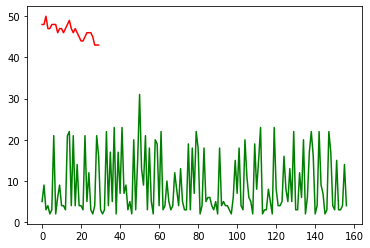

In [ ]:
plt.plot(np.diff(peak_idxs),c = 'r')
plt.plot(np.diff(valley_idxs), c= 'g')

In [ ]:
np.diff(valley_idxs)

array([ 3,  5,  4,  4,  4,  3,  2,  7,  3,  4,  4,  2,  5,  3,  6,  3,  5,
        3,  4,  6,  3,  4,  2,  3,  3,  2,  4,  5,  3,  4,  3,  2,  2,  2,
        3,  5,  2,  2,  3,  2,  2,  2,  2,  2,  2,  3,  3,  4,  4,  5,  2,
        2,  5,  3,  6,  2,  2,  3,  4,  5,  4,  5,  3,  4,  4,  5,  6,  3,
        3,  3,  3,  2,  3,  2,  8,  3,  2,  4,  3,  3,  3,  2,  6,  4,  4,
        3,  2,  4,  3,  2,  3,  3,  5,  4,  5,  3,  2,  2,  2,  3,  2,  3,
        3,  6,  2,  2,  2,  3,  2,  4,  2,  3,  3,  2,  4,  3,  2,  2,  4,
        3,  2,  3,  6,  3,  2,  2,  4,  5,  4,  2,  4,  3,  6,  3,  3,  4,
        3,  2,  2,  3,  7,  2,  2,  4,  3,  3,  3,  3,  2,  2,  3,  3,  3,
        2,  3,  4,  3,  2,  3,  3,  3,  3,  3,  3,  2,  5,  5,  4,  2,  2,
        6,  3,  3,  5,  2,  3,  2,  2,  3,  2,  2,  3,  3,  2,  2,  3,  4,
        6,  3,  3,  3,  2,  4,  2,  2,  4,  3,  6,  5,  2,  2, 11,  2,  4,
        2,  5,  4,  3,  2,  3,  6,  3,  4,  2,  2,  4,  3,  3,  3,  3,  2,
        3,  2,  3,  3,  2

In [ ]:
np.median(np.diff(valley_idxs))

3.0

### re-selecting valleys

In [ ]:
def select_valley(peaks,valleys):
  assert len(peaks) < len(valleys), "Need the valley set bigger than the peak set."
  assert len(valleys) > 2, "Need the valley set at least 2 element."
  assert len(peaks) > 1, "Need the valley set at least 1 element."
  val = []
  for p in peaks:
    for v,v_next in zip(valleys[0:-1], valleys[1:]):
      if v < p and v_next > p:
        val.append(v)
      #elif ((v < p) and ((v - val[-1])> np.mean(np.diff(val)*0.9))):
      #  val.append(v)
  #if (valleys[-1] - val[-1])>np.mean(np.diff(val))*0.8:
  #  val.append(valleys[-1])
  return val


val = select_valley(peak_idxs,valley_idxs)

In [ ]:
valley_idxs[np.where(np.array(valley_idxs) ==60645)[0][0]]

60645

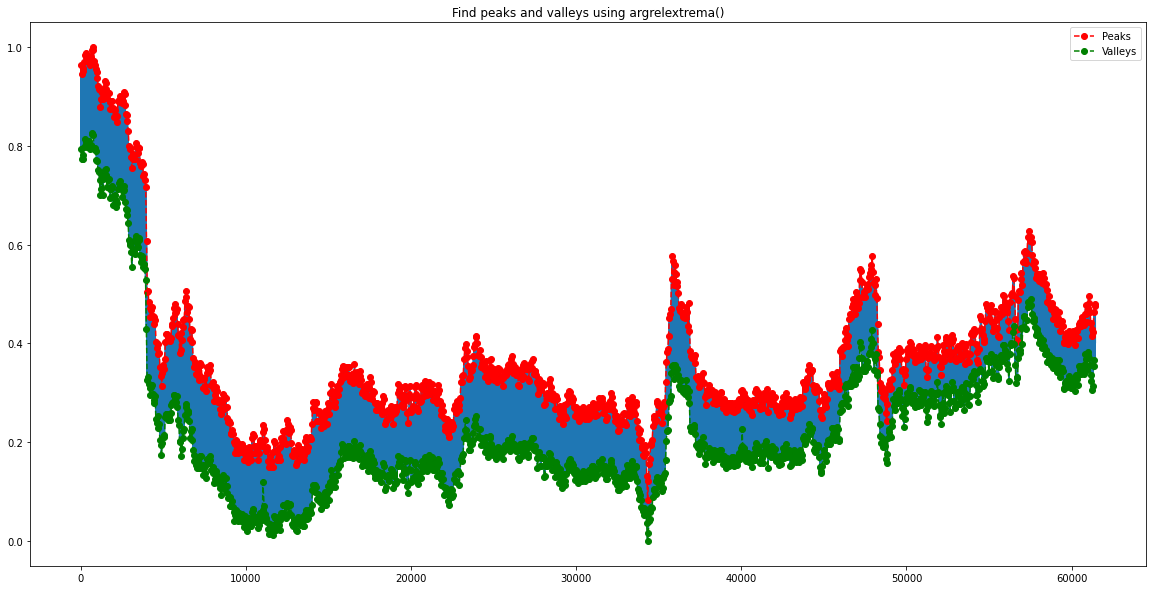

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

L1, L2 = 0, len(data)
# find peak max
peak_idxs = signal.argrelextrema(data, np.greater,order=15)
peak_idxs = peak_idxs[0]
peak_idxs = [i  for i in peak_idxs if (i >=L1 and i <=L2)]

#find peak min
valley_idxs = signal.argrelextrema(data, np.less,order=1)
valley_idxs = valley_idxs[0]
valley_idxs = [i  for i in valley_idxs if (i >=L1 and i <=L2)]
#plot main graph
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data[L1:L2])
# plot peaks
peak_x = [i - L1 for i in peak_idxs]
peak_y =  data[peak_idxs]
ax.plot(peak_x, peak_y, marker='o', linestyle='dashed', color='r', label='Peaks')
# plot reselected valleys
val = select_valley(peak_idxs,valley_idxs)

re_valley_x = [i - L1 for i in val]
valley_y =  data[val]
ax.plot(re_valley_x, valley_y, marker='o', linestyle='dashed', color='g', label='Valleys')

# Save graph to file.
plt.title('Find peaks and valleys using argrelextrema()')
plt.legend(loc='best')
#plt.savefig('argrelextrema.png')

In [ ]:
L = min(len(peak_y), len(valley_y))

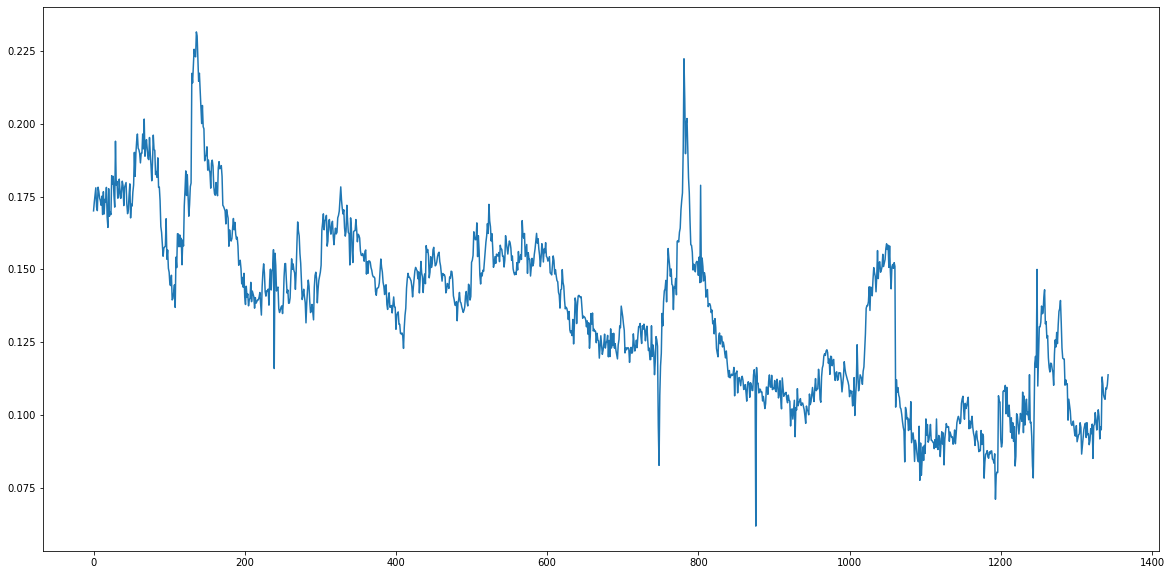

In [ ]:
z = np.array(peak_y[0:L]) - np.array(valley_y[0:L])

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(z)


### S-Golay filter

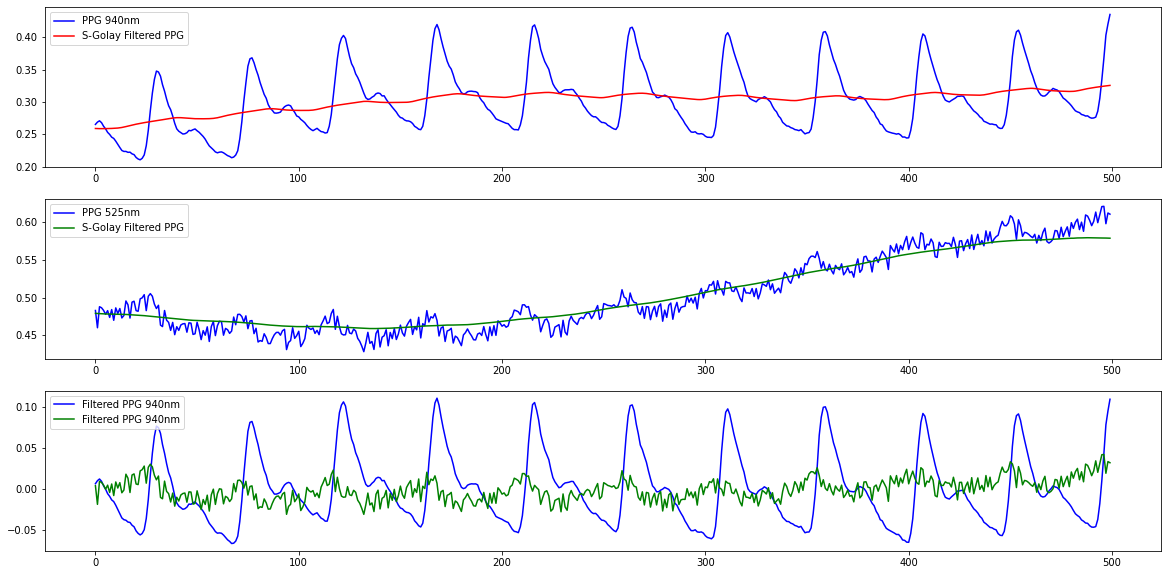

In [71]:
from scipy.signal import savgol_filter

data1 = read_data(ppg,name='940nm')
data2 = read_data(ppg,name='580nm')

ppgFiltered1 = savgol_filter(data1, window_length = 211, polyorder =0)
ppgFiltered2 = savgol_filter(data2, window_length = 211, polyorder =0)

bwrPPG1 = data1 - ppgFiltered1
bwrPPG2 = data2 - ppgFiltered2
plt.subplots(3,1,figsize=(20,10))
L1, L2 = 5000, 5500
plt.subplot(3, 1, 1)
plt.plot(data1[L1:L2], "b-", label="PPG 940nm")
plt.plot(ppgFiltered1[L1:L2], "r-", label="S-Golay Filtered PPG")
#plt.plot(baseline4[L1:L2], "g-", label="baseline(Mean)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data2[L1:L2], "b-", label="PPG 525nm")
plt.plot(ppgFiltered2[L1:L2], "g-", label="S-Golay Filtered PPG")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(bwrPPG1[L1:L2], "b-", label="Filtered PPG 940nm")
plt.plot(bwrPPG2[L1:L2], "g-", label="Filtered PPG 940nm")
plt.legend()
plt.show()



###Decompose 8 levels of wavelets 

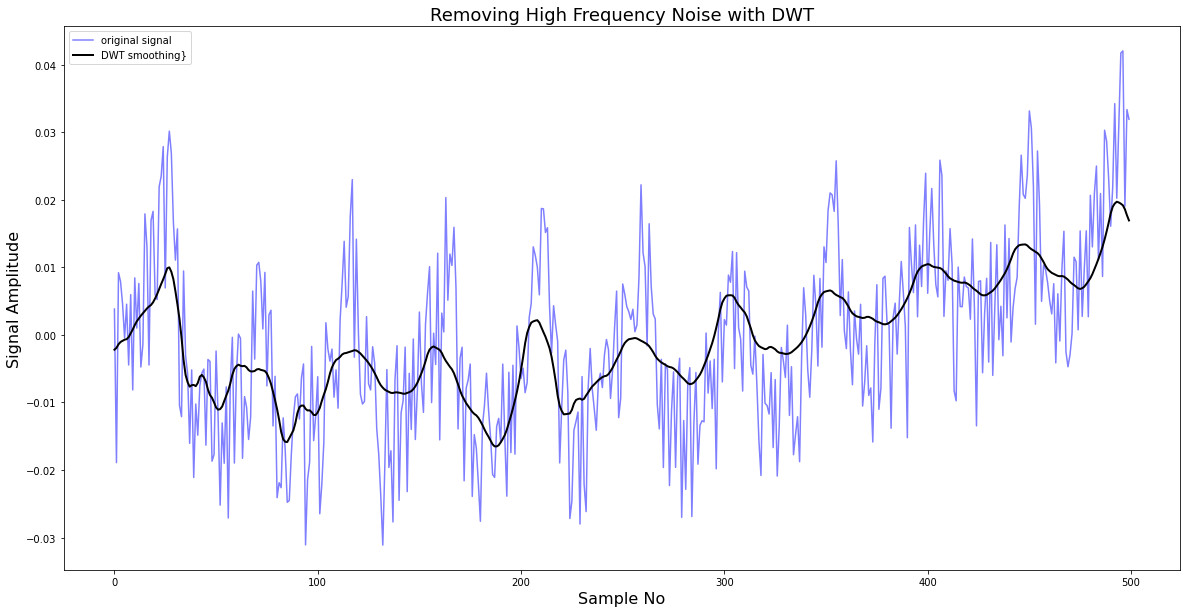

In [95]:
import pywt

#coeffs = pywt.wavedec(bwrPPG2, 'db4', level=8)

#coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
# reconstruct signal
#rec_signal = pywt.waverec(coeffs, 'db4')
#

def lowpassfilter(signal, thresh = 0.63, wavelet="db4", level=8):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, level=level, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

L1, L2 = 5000, 5500
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(bwrPPG2[L1:L2], color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(bwrPPG2, 0.28)
ax.plot(rec[L1:L2], 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()

###Using swt

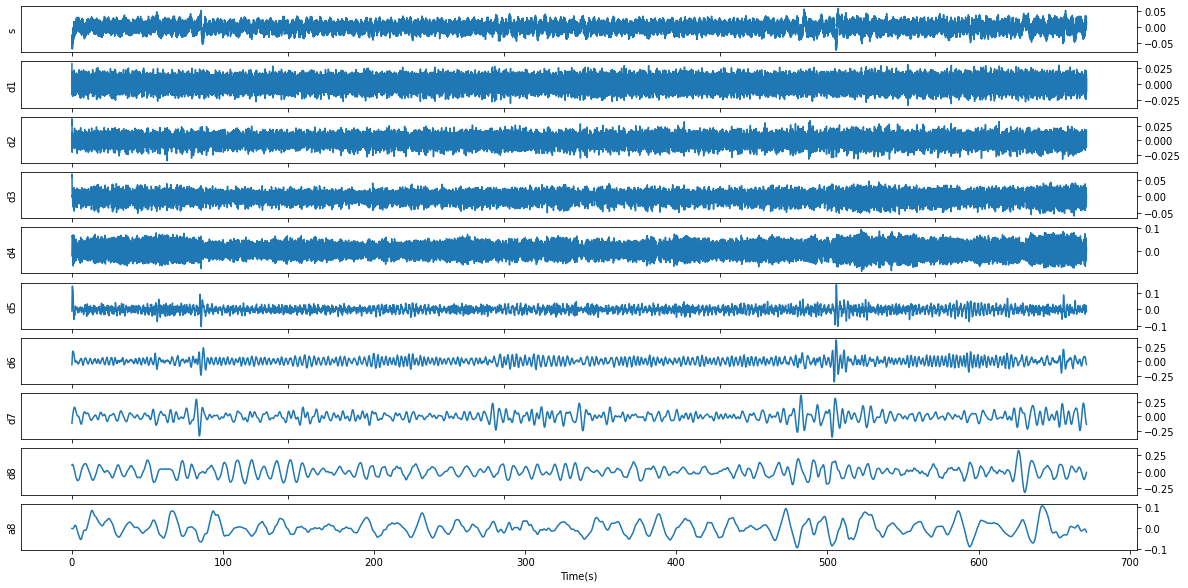

In [142]:
coeffs = pywt.swt(bwrPPG2, 'db4', level=9)

fig,axs = plt.subplots(len(coeffs)+1,1,figsize=(20,10))
#fig.subplots_adjust(hspace=0.2, wspace=0.0)
#plt.rcParams['axes.titlepad'] = 20 
L1, L2 = 0, 47000
# range of x after convert to sampling rate at 70
x = [i/70 for i in range(L1,L2)]


n = [i for i in range(0,len(coeffs)+1)]
labels = ['s','d1','d2','d3','d4','d5','d6','d7','d8', 'a8']
for ax,i in zip(axs,n):
  

  if i==len(coeffs):
     ax.plot(x, coeffs[0][0][L1:L2])
     ax.set_xlabel('Time(s)') 
     #ax.xaxis.set_ticklabels(xlabel)
  elif i==0:
    ax.plot(bwrPPG2[L1:L2])
    #ax.xaxis.set_ticklabels([])
  else:
    ax.plot(coeffs[len(coeffs)-1-i][1][L1:L2])
    #ax.xaxis.set_ticklabels([]) # hidden xtick
    #ax.set_ylim([-0.1,0.1])
  ax.set_ylabel(labels[i])
  ax.yaxis.tick_right()
  ax.yaxis.Exponent = 5
  #ax.yaxis.set_label_position("right")
  ax.label_outer() # hidden xtick
  

In [225]:
WDS = pywt.swt(bwrPPG2, 'db4', level=8, trim_approx=True) 

#### Set a Threshold function

In [199]:
def set_threshold(signal, thresh=0.63):
  thresh = thresh*np.abs(np.nanmax(signal))
  print(thresh)
  signal[signal<thresh]=0
  return signal

In [220]:
np.size(WDS[7:9])

122880

In [229]:
WDS[8] = set_threshold(WDS[8],0.4)
WDS[7] = set_threshold(WDS[7],0.4)
WDS[6] = set_threshold(WDS[6],0.4)

0.013840410101590657
0.019818236139776485
0.01676895820119579


In [152]:
WDS[-3:] = np.zeros_like(WDS[-3:])

In [231]:
# Khôi phục tín hiệu với [D6, D5,..,D1]
s2 = pywt.iswt(WDS[0:10], 'db4')

Text(0.5, 0, 'Samples')

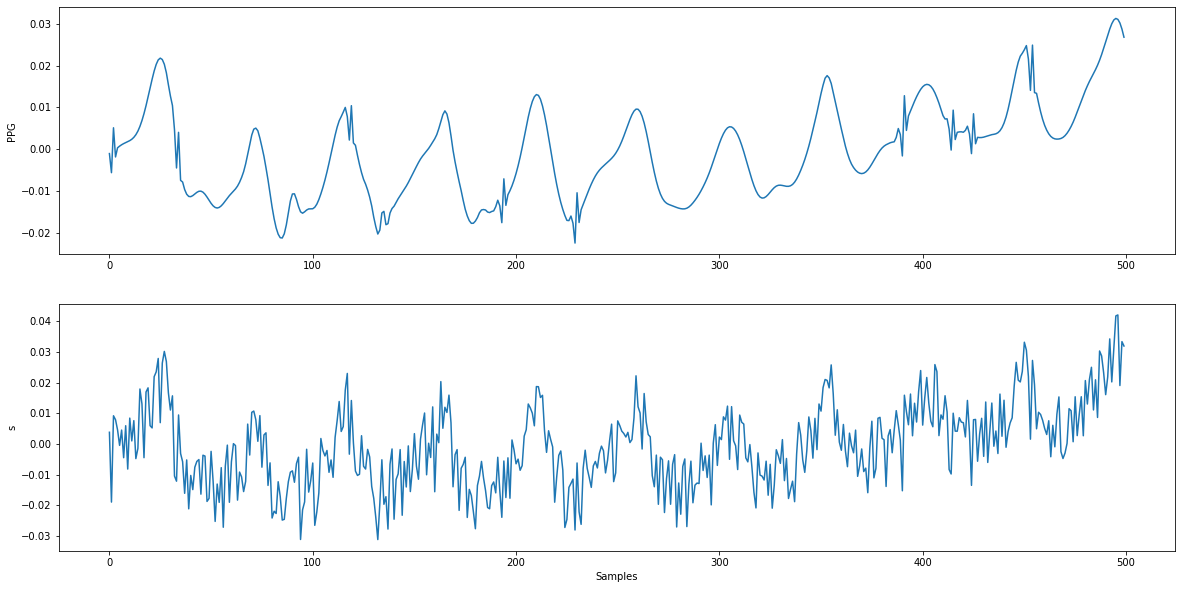

In [232]:
L1, L2 = 5000, 5500
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(s2[L1:L2])
plt.ylabel('PPG')

plt.subplot(212)
plt.plot(bwrPPG2[L1:L2])
plt.ylabel('s')
plt.xlabel('Samples')